  ## 1. Introduction

* Project

We aim to develop Python-based data analysis software The goal is to develop software that can analyze Micro Led data in detail.

## 2. Project information
 
    
* **Detailed project**
    
  At first,

  The main task is to receive data from the customer and then receive the request.
 
  Main request 
  + Wafer
  + Die row & colum
  + option
 
  We can analyze the selected data by specifying specific elements In order to develop such analysis software, a black box(software) that implments this function is created to solve the customer's request.

  In the software,
  * We process the raw data and print it out. 
  * We show the processed data as a figure and save the file. 
 
 **You can selectively output only the graph you want.**
 
  Please put the data in the 'dat' folder
  specify the file path
  Run the run.py 

* **Run file description** 

   Data is processed by selecting only files in "dat"
   
   Load the module that processes and fits raw data and the module that makes the data parsed from accel, respectively.

## 3. Install and Run 

 * Getting Stared
    + Entered the Terminal, write down 'pip install -r requirements.txt' and download it. \
 ``pip install -r requirements.txt``


 * How to Run
   + Choose the raw data folder customer want to analyze.


## 4. Description of the module file feature


 ### 1) Fitting module 
 
   * The graph is drawn by parsing the raw data of PL data, EL data in the Accel file.
   * The fitting of parsing a raw data and displays the data value y-axis corresponding to x-axis and stored in the graph to visualize the image.

## 5. Example of analysis result

In [1]:
import os

os.chdir('../')
print(os.getcwd())

C:\Users\ASDL\Desktop\micro_led_analysis


  ❗caution❗
>
> If an error occurs, please refresh the jupyter notebook or restart the kernel 

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [20]:
df = pd.read_excel('./dat/Ver6.xlsx')
df.drop(['No',' X Index',' Y Index',' X Size',' Y Size'],axis=1,inplace=True)

df['PL JudgeType'].unique()  #array(['PL OK', 'PL NG'], dtype=object)

array(['PL OK', 'PL NG'], dtype=object)

In [21]:
for i in range(0,7590):
    if df.loc[i,'PL JudgeType'] == 'PL OK':
        df.loc[i,'PL JudgeType'] = 1
    else:
        df.loc[i,'PL JudgeType'] = 0

for i in range(0,7590):
    if df.loc[i,'Itself Judge'] == 'EL OK':
        df.loc[i,'Itself Judge'] = 1
        df.loc[i,'Error flag'] = 'No error'
    else:
        df.loc[i,'Error flag'] = df.loc[i,'Itself Judge']
        df.loc[i,'Itself Judge'] = 0
     
df_1 = pd.read_excel('./dat/Ver6.xlsx')
df_1.drop(['No',' X Index',' Y Index',' X Size',' Y Size',' PL_Min Value'],axis=1,inplace=True)

df_1['PL JudgeType'].unique()  #array(['PL OK', 'PL NG'], dtype=object)


for i in range(0,7590):
    if df_1.loc[i,'PL JudgeType'] == 'PL OK':
        df_1.loc[i,'PL JudgeType'] = 1
    else:
        df_1.loc[i,'PL JudgeType'] = 0

for i in range(0,7590):
    if df_1.loc[i,'Itself Judge'] == 'EL OK':
        df_1.loc[i,'Itself Judge'] = 1
    else:
        df_1.loc[i,'Itself Judge'] = 0


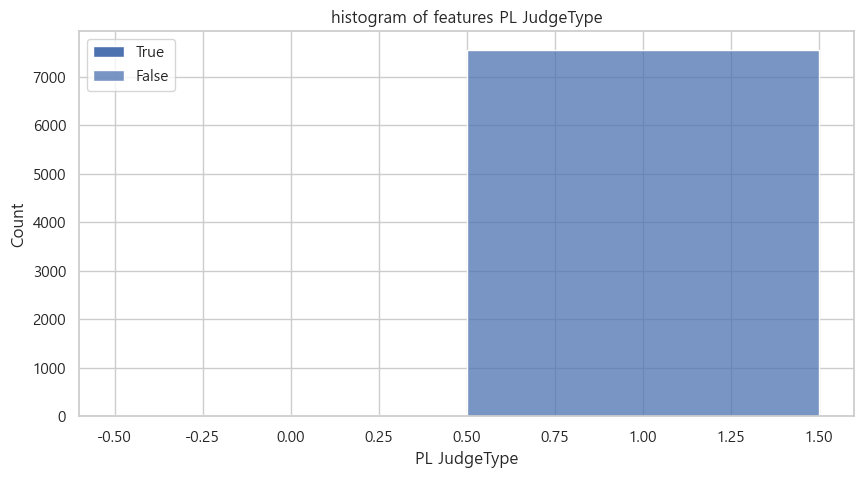

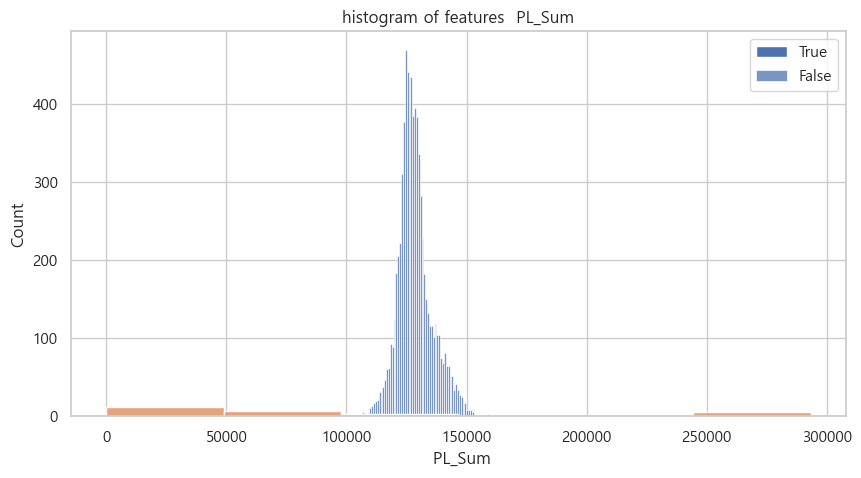

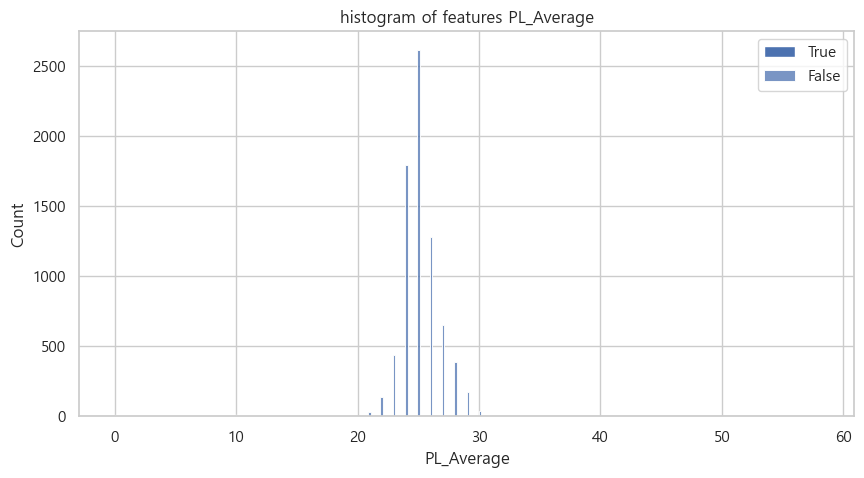

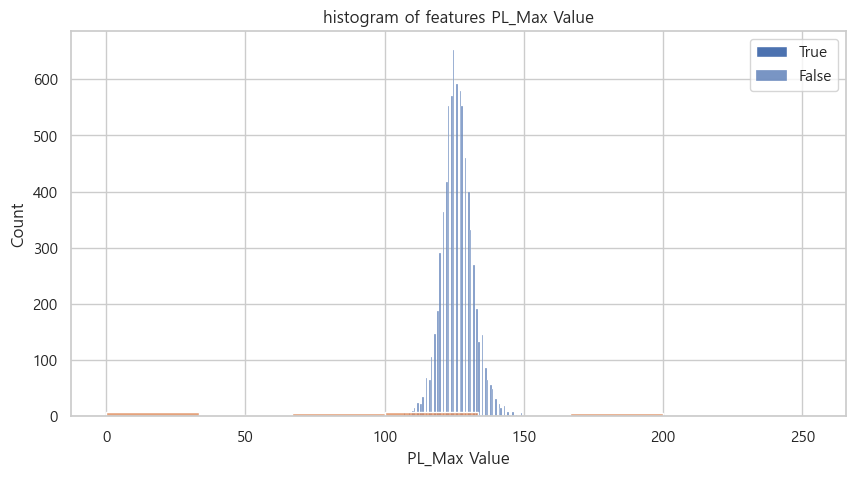

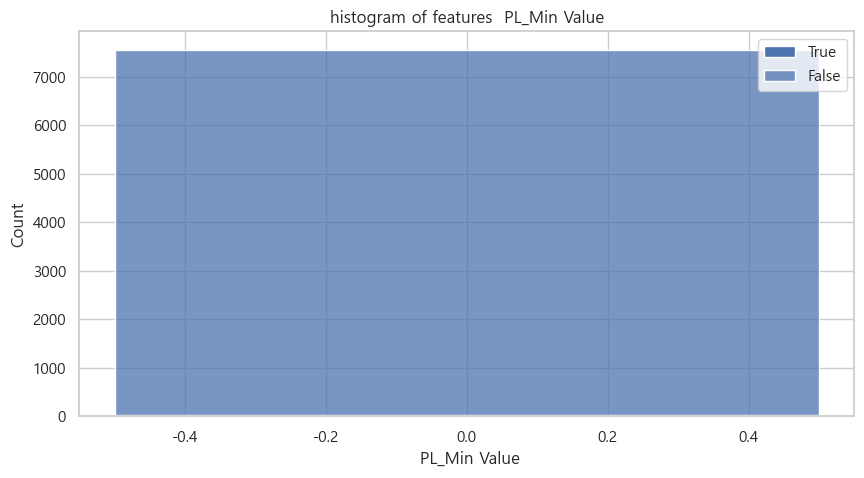

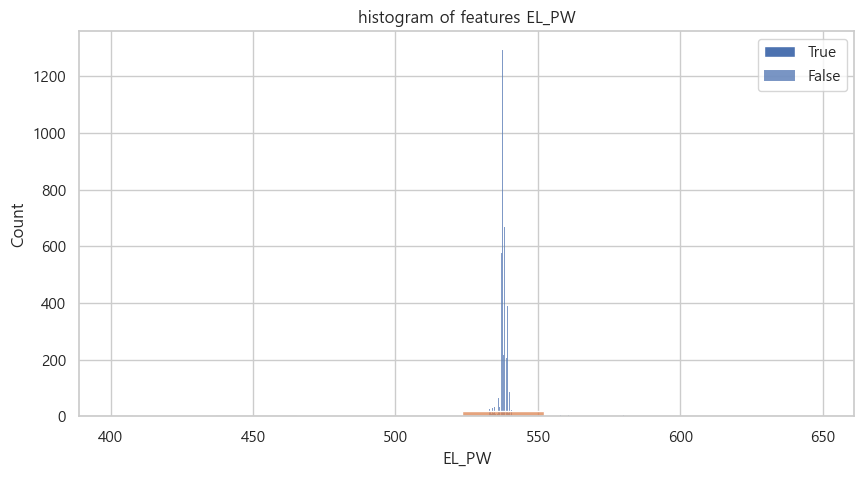

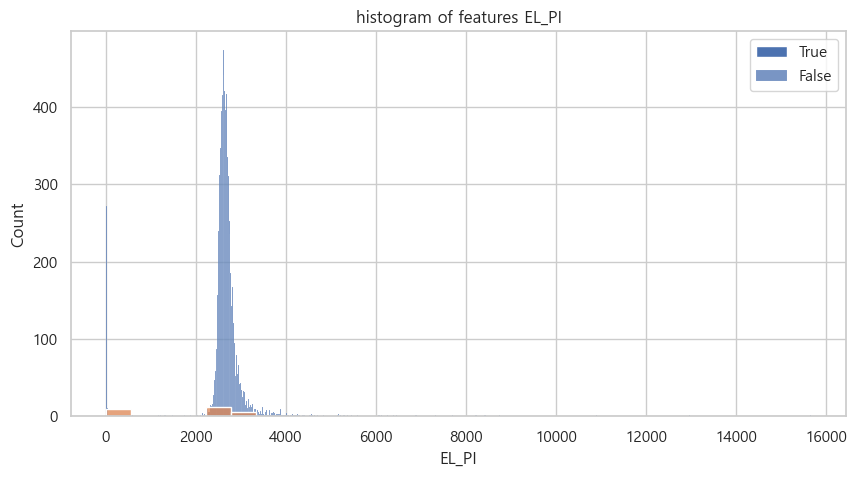

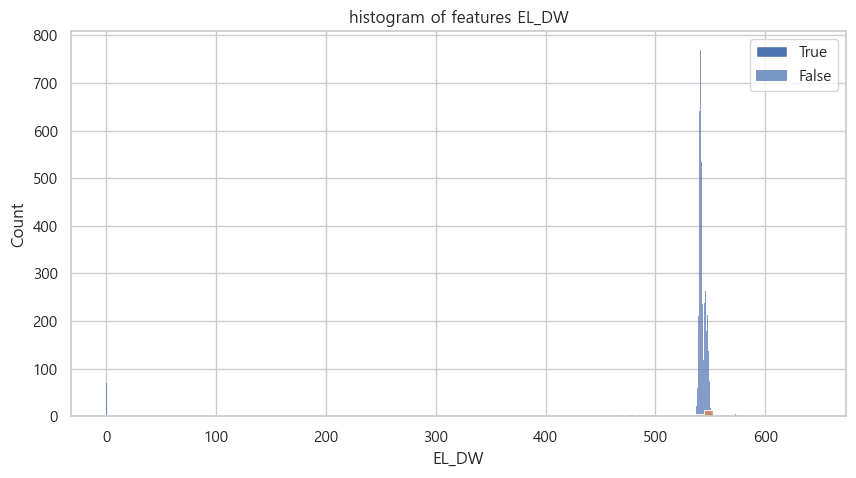

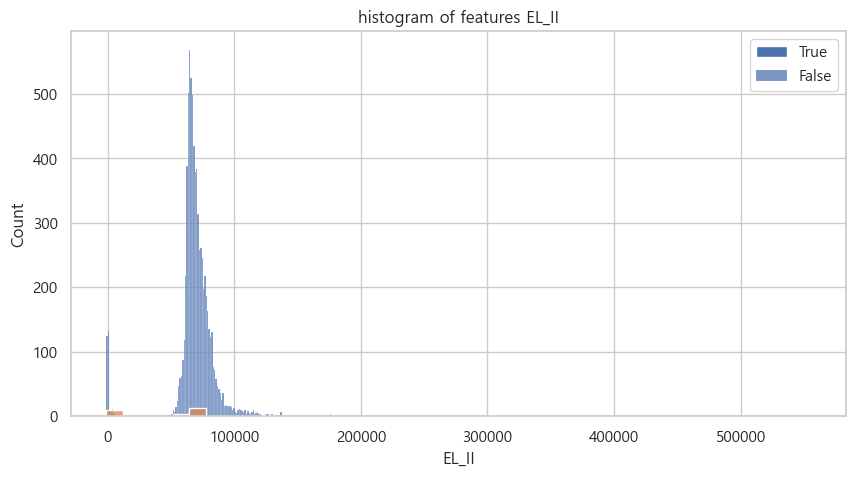

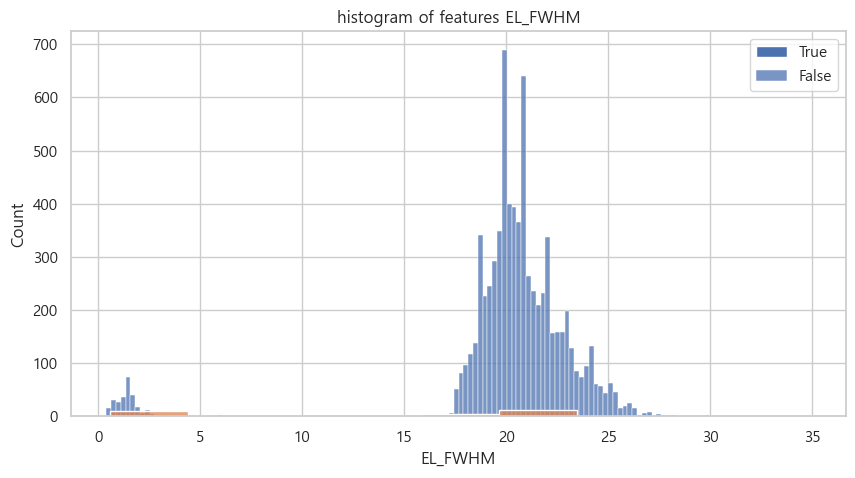

In [ ]:
# Column distribution by target --> column 별로 데이터 분포를 시각화 해보는 것
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name) 

for cnt, col in enumerate(df):
    try:
        plt.figure(figsize=(10, 5))
        sns.histplot(df[col][df['PL JudgeType']==1])
        sns.histplot(df[col][df['PL JudgeType']==0])
        plt.legend(['True','False'], loc='best')
        plt.title('histogram of features '+str(col))
        plt.show()

        if cnt >= 15: # 15개 칼럼까지만 출력
            break

    except Exception as e:
        pass

In [ ]:
# 2 Dimension Plot --> 차원축소 기법을 이용하여 2차원으로 데이터를 시각화
X = df.drop(['PL JudgeType','Error flag'], axis=1)
y = df['PL JudgeType']

scaler = StandardScaler()
cancer_scale = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# plot 2D
from sklearn.decomposition import PCA

pca2 = PCA(n_components=2)
data_pca2 = pca2.fit_transform(cancer_scale)

plt.figure(figsize=(12, 8))
plt.scatter(data_pca2[:,0], data_pca2[:,1], c=df['PL JudgeType'], s=40, edgecolors='white')
plt.title("2D of Target distribution by PL JudgeType")
plt.xlabel('pcomp 1')
plt.ylabel('pcomp 2')
plt.show()

In [ ]:
# 3 Dimension Plot --> 차원축소 기법을 이용하여 3차원으로 데이터를 시각화
from mpl_toolkits.mplot3d import Axes3D

pca3 = PCA(n_components=3)
data_pca3 = pca3.fit_transform(cancer_scale)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_pca3[:,0], data_pca3[:,1], data_pca3[:,2], c=df['PL 장비 JudgeType'], s=60, edgecolors='white')
ax.set_title('3D of Target distribution by PL JudgeType')
ax.set_xlabel('pcomp 1')
ax.set_ylabel('pcomp 2')
ax.set_zlabel('pcomp 3')
plt.show()


In [ ]:
cols = ['PL JudgeType',' PL_Sum','PL_Average','PL_Max Value','EL_PW','EL_PI','EL_DW','EL_II','EL_FWHM','EL_IR(A)','EL_VR(V)','EL_VF1(V)','EL_VF2(V)','EL_VF3(V)','EL_PO-Top(W)','Itself Judge']
corr = df_1[cols].corr(method = 'pearson')

corr.values
column_names = ['PL JudgeType',' PL_Sum','PL_Average','PL_Max Value','EL_PW','EL_PI','EL_DW','EL_II','EL_FWHM','EL_IR(A)','EL_VR(V)','EL_VF1(V)','EL_VF2(V)','EL_VF3(V)','EL_PO-Top(W)','Itselff Judge']
sns.set(font_scale=1,rc={"axes.unicode_minus":False})
plt.figure(figsize = (13,10))
hm = sns.heatmap(corr.values, #데이터
            cbar=True, #오른쪽 컬러 막대 출력 여부
            annot=True, #차트에 숫자를 보여줄 것인지 여부
            square=True, #차트를 정사각형으로 할 것인지
            fmt='.2f', #숫자의 출력 소수점 자리 개수 조절
            annot_kws={'size': 15}, #숫자 출력 시 숫자 크기 조절
            yticklabels=column_names, #y축에 컬럼명 출력
            xticklabels=column_names, #x축에 컬럼명 출력
            cmap="RdYlGn") 
plt.tight_layout()
plt.show()

In [ ]:
sns.set(style='whitegrid')
sns.pairplot(df_1[['PL JudgeType',' PL_Sum','PL_Average','PL_Max Value']])#,'EL_PW','EL_PI','EL_DW','EL_II','EL_FWHM','EL_IR(A)','EL_VR(V)','EL_VF1(V)','EL_VF2(V)','EL_VF3(V)','EL_PO-Top(W)','Itself Judge']])
plt.show()